In [2]:
import pandas as pd
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 200

col_names = ["submission_id", "session","date","level","code","server_error","client_error","version", "lang", "email", "username", "is_test", "demo", "start"]
df = pd.read_csv("../../Data/2-logs-plain-2.csv", names=col_names)
df = df.iloc[1:]

#Catch the string, convert the levels, then count the levels with server errors
df['level'] = pd.to_numeric(df.level, errors='coerce')
df = df.loc[df['level'] < 14]
df = df.loc[df['demo'] != True]
df = df.loc[df['start'] != True] 

print(df.shape[0])
print(df['session'].unique().shape)

1084999
(300564,)


In [6]:
print(df.head(1))
print(df.tail(1))

              submission_id                           session  \
1  5e73352fc4a5cb162866ec66  260e30d53466430ba2f9814bac7aece3   

                         date  level                            code  \
1  2020-03-19 09:02:39.666213    1.0  ask Wat is je lievelingskleur?   

  server_error client_error          version lang email username is_test  \
1            -            -  Mar 19 (739f13)    -     -        -       -   

   demo  start  
1  True  False  
                    submission_id                           session  \
1224178  60d095ee8ea8ec25bd124be7  d18e5262edc64907843d593f08d539c9   

                               date  level                          code  \
1224178  2021-06-21 13:36:46.393318    1.0  print Hello welcome to Hedy!   

        server_error client_error          version lang email username  \
1224178            -            -  Jun 21 (efb911)   en     -     None   

        is_test  demo  start  
1224178    None  True  False  


In [2]:
print(df.shape[0])

v = df['level'].value_counts()
df_level_count = df[df['level'].isin(v.index[v.gt(100)])]
level_count = df_level_count['level'].value_counts()

print(level_count)

1209123
2.0     370201
7.0     296141
1.0     160169
3.0     122308
4.0     105966
5.0      61791
6.0      57894
8.0      11423
9.0       6411
10.0      5170
12.0      5082
11.0      4204
13.0      2363
Name: level, dtype: int64


In [17]:
print(df.shape[0])

v = df['lang'].value_counts()
df_lang_count = df[df['lang'].isin(v.index[v.gt(10)])]
lang_count = df_lang_count['lang'].value_counts()

print(lang_count)

df_error_level_count = df_lang_count.loc[df['server_error'] != "None"]
df_error_level_count = df_error_level_count.loc[df_error_level_count['server_error'] != "-"]

print(df_error_level_count.shape)

v = df_error_level_count['lang'].value_counts()
df_error_level_count = df_error_level_count[df_error_level_count['lang'].isin(v.index[v.gt(10)])]
error_level_count = df_error_level_count['lang'].value_counts()

print(error_level_count)

df_counts = lang_count.to_frame().reset_index()
df_counts = df_counts.rename(columns = {'index': 'lang', 'lang':'Count'})

df_error_counts = error_level_count.to_frame().reset_index()
df_error_counts = df_error_counts.rename(columns = {'index': 'lang', 'lang':'Error count'})

print(df_counts)
print(df_error_counts)

df_final = pd.merge(df_counts, df_error_counts, on = "lang", how = "inner")
df_final['percentage'] = df_final["Error count"] / df_final["Count"] * 100

df_final = df_final.set_index('lang')
df_final = df_final.sort_index()

print(df_final)

1209123
en       967822
nl       145791
-         79440
es        11057
fr         2317
pt_br      1105
de          807
zh          288
it          187
hu           59
el           20
Name: lang, dtype: int64
(293748, 14)
en       265324
nl        25511
-          1408
es         1133
fr          137
pt_br       123
de           79
zh           13
Name: lang, dtype: int64
     lang   Count
0      en  967822
1      nl  145791
2       -   79440
3      es   11057
4      fr    2317
5   pt_br    1105
6      de     807
7      zh     288
8      it     187
9      hu      59
10     el      20
    lang  Error count
0     en       265324
1     nl        25511
2      -         1408
3     es         1133
4     fr          137
5  pt_br          123
6     de           79
7     zh           13
        Count  Error count  percentage
lang                                  
-       79440         1408    1.772407
de        807           79    9.789343
en     967822       265324   27.414545
es      11057   

In [3]:
df_error_level_count = df_level_count.loc[df['server_error'] != "None"]
df_error_level_count = df_error_level_count.loc[df_error_level_count['server_error'] != "-"]

print(df_error_level_count.shape)

v = df_error_level_count['level'].value_counts()
df_error_level_count = df_error_level_count[df_error_level_count['level'].isin(v.index[v.gt(100)])]
error_level_count = df_error_level_count['level'].value_counts()

print(error_level_count)

(293977, 14)
7.0     121185
2.0      52909
3.0      27936
4.0      27666
1.0      23945
5.0      14132
6.0      13388
8.0       4199
11.0      2358
10.0      2308
9.0       1797
12.0      1290
13.0       864
Name: level, dtype: int64


In [4]:
#Convert to a dataframe and combine both Pandas series
df_counts = level_count.to_frame().reset_index()
df_counts = df_counts.rename(columns = {'index': 'level', 'level':'Count'})

df_error_counts = error_level_count.to_frame().reset_index()
df_error_counts = df_error_counts.rename(columns = {'index': 'level', 'level':'Error count'})

print(df_counts)
print(df_error_counts)

    level   Count
0     2.0  370201
1     7.0  296141
2     1.0  160169
3     3.0  122308
4     4.0  105966
5     5.0   61791
6     6.0   57894
7     8.0   11423
8     9.0    6411
9    10.0    5170
10   12.0    5082
11   11.0    4204
12   13.0    2363
    level  Error count
0     7.0       121185
1     2.0        52909
2     3.0        27936
3     4.0        27666
4     1.0        23945
5     5.0        14132
6     6.0        13388
7     8.0         4199
8    11.0         2358
9    10.0         2308
10    9.0         1797
11   12.0         1290
12   13.0          864


In [5]:
df_final = pd.merge(df_counts, df_error_counts, on = "level", how = "inner")
df_final['percentage'] = df_final["Error count"] / df_final["Count"] * 100
df_final['level'] = df_final['level'].astype(int)

df_final = df_final.set_index('level')
df_final = df_final.sort_index()

print(df_final)

        Count  Error count  percentage
level                                 
1      160169        23945   14.949834
2      370201        52909   14.291966
3      122308        27936   22.840697
4      105966        27666   26.108374
5       61791        14132   22.870645
6       57894        13388   23.125022
7      296141       121185   40.921385
8       11423         4199   36.759170
9        6411         1797   28.029949
10       5170         2308   44.642166
11       4204         2358   56.089439
12       5082         1290   25.383707
13       2363          864   36.563690


Text(0, 0.5, 'Code submissions')

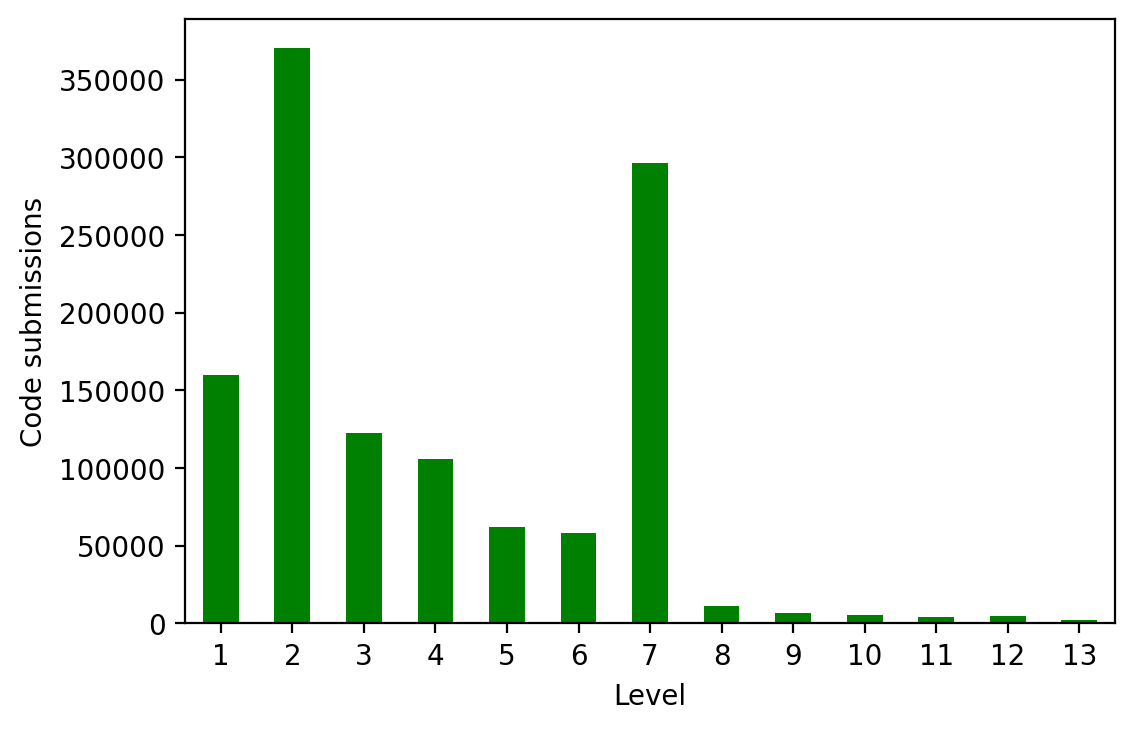

In [6]:
count_plot = df_final['Count'].plot.bar(rot=0, color='green')
count_plot.set_xlabel("Level")
count_plot.set_ylabel("Code submissions")

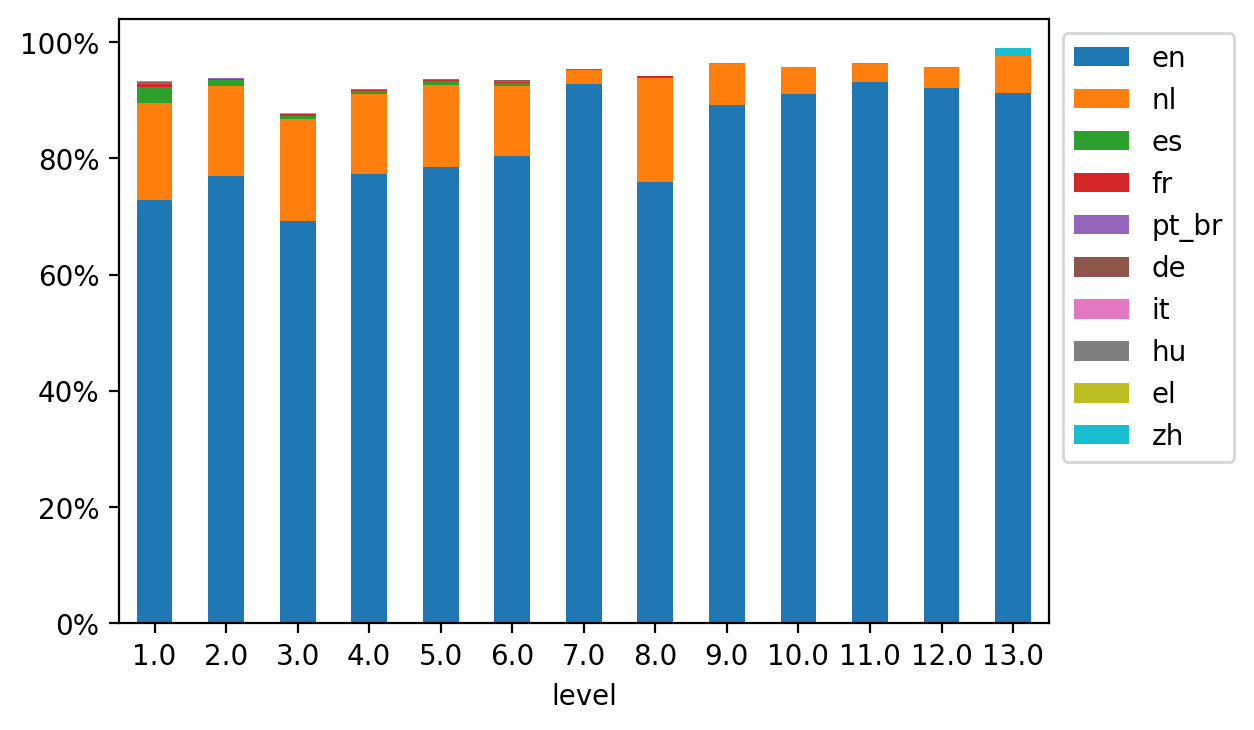

In [9]:
import matplotlib.ticker as mtick

languages = ['en', 'nl', 'es', 'fr', 'pt_br', 'de', 'it', 'hu', 'el', 'zh']
df_language = df[['level']].copy()
for language in languages:
    df_language[language] = df['lang'].str.contains(language)

df_level_count = df_language['level'].value_counts().reset_index()
df_level_count.columns = ['level', 'count']

df_language = df_language.groupby(by="level").sum()
df_language = pd.merge(df_language, df_level_count, on = "level", how = "inner") 

for language in languages:
    df_language[language] = df_language[language] / df_language['count'] * 100

del df_language['count']   
df_language = df_language.set_index('level')

plot = df_language.plot(rot=0, kind='bar', stacked=True)
plot.yaxis.set_major_formatter(mtick.PercentFormatter())
plot.legend(bbox_to_anchor=(1,1), loc="upper left")

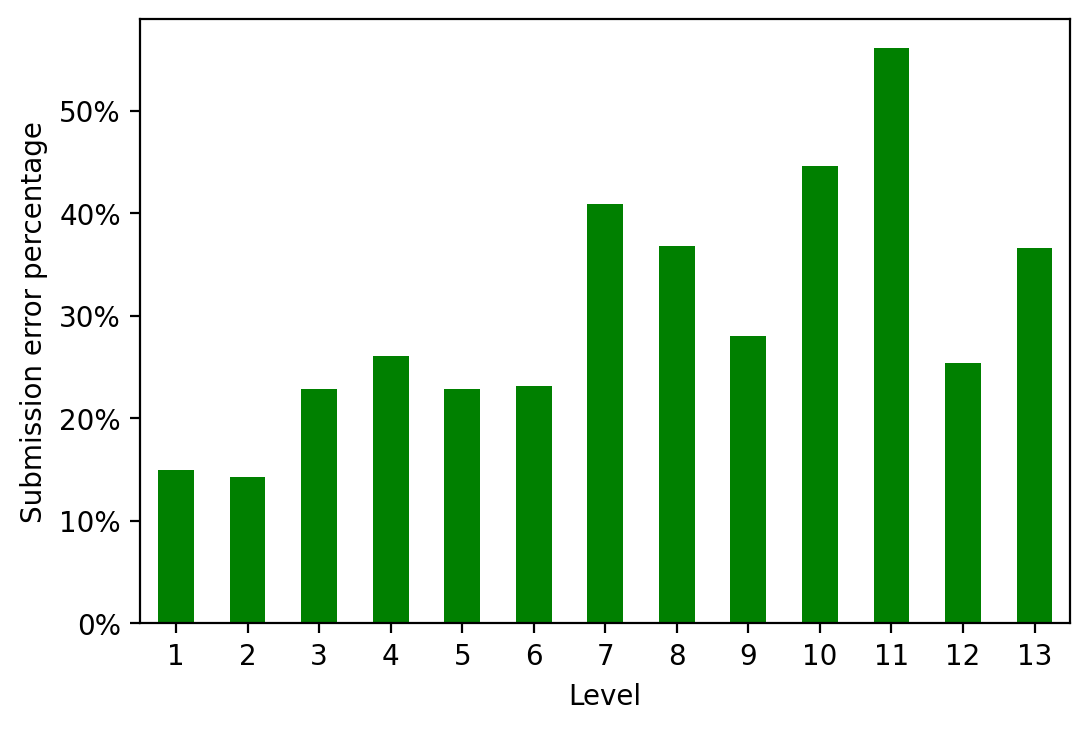

In [8]:
import matplotlib.ticker as mtick

eror_plot = df_final['percentage'].plot.bar(rot=0, color='green')
eror_plot.set_xlabel("Level")
eror_plot.set_ylabel("Submission error percentage")
eror_plot.yaxis.set_major_formatter(mtick.PercentFormatter())